In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as plticker

In [2]:
df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df.head()

,id,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,770,10000,1.0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df['date']=pd.to_datetime(df['date'])
df['date1']=df['date'].apply(lambda x : x.date())
df['day']=df['date1'].apply(lambda x:x.day)
df.drop('date1',axis=1,inplace=True)

In [6]:
df['date1']=df['date'].apply(lambda x : x.date())
df['year']=df['date1'].apply(lambda x:x.year)
df.drop('date1',axis=1,inplace=True)

In [7]:
df['date1']=df['date'].apply(lambda x : x.date())
df['month']=df['date1'].apply(lambda x:x.month)
df.drop('date1',axis=1,inplace=True)

In [8]:
df['age']=df['year']-df['yr_built']

In [9]:
df['p/sqft']=df['price']/df['sqft_living']

In [4]:
df['p/sqft15']=df['price']/df['sqft_living15']

In [9]:
df['sqftchange']=df['sqft_living15']-df['sqft_living']

In [12]:
#After trying on price,p/sqft and p/sqft15 p/sqft is found to give the best score so everywhere p/sqft is only considered

ZIPCODE

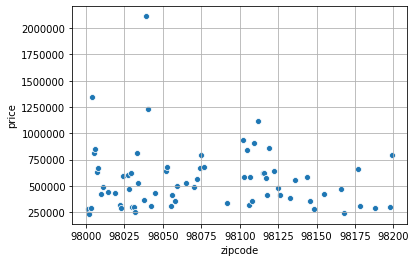

In [66]:
a=pd.DataFrame(df.groupby('zipcode')['price'].mean())
a['zipcode']=a.index
plt.grid(b=1)
sns.scatterplot(data=a,x='zipcode',y='price')
#average price for each zipcode
#As we can see there is clear separation in the prices which will become even clearer in the next figure as there p/sqft
#is considered

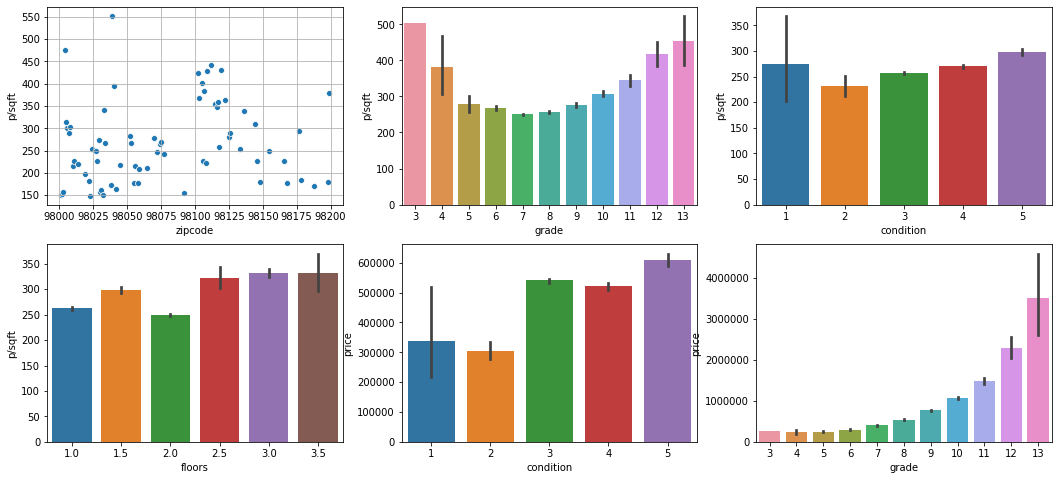

In [143]:
plt.figure(figsize=(18,8))
plt.subplot(2,3,1)
a=pd.DataFrame(df.groupby('zipcode')['p/sqft'].mean())
a['zipcode']=a.index
plt.grid(b=1)
sns.scatterplot(data=a,x='zipcode',y='p/sqft')#average price/sqft for each zipcode

plt.subplot(2,3,2)
sns.barplot(data=df,x='grade',y='p/sqft')

plt.subplot(2,3,3)
sns.barplot(data=df,x='condition',y='p/sqft')

plt.subplot(2,3,4)
sns.barplot(data=df,x='floors',y='p/sqft')

plt.subplot(2,3,5)
sns.barplot(data=df,x='condition',y='price')

plt.subplot(2,3,6)
sns.barplot(data=df,x='grade',y='price')


In [10]:
#this function was written initially for dividing based on prices but then dropped
def fzip(x):
    if x in a[a['price']<5e+05].index:
        return 1;
    elif x in a[a['price']<7.5e+05].index:
        return 2;
    elif x in a[a['price']<1e+06].index:
        return 3;
    elif x in a[a['price']<1.5e+06].index:
        return 4;
    else:
        return 5;

In [11]:
#I first creted a dataframe 'a' which has index as zipcode and each index has corresponding mean price for that particular zicode
#Again this was dropped as it is based on price
a=pd.DataFrame(df.groupby('zipcode')['price'].mean())
a['zipcode']=a.index
df['zipcat']=df['zipcode'].apply(fzip)

In [12]:
#This function is written for creating categorical feature based on price/sqft, the cutoff values have been manually been 
#selected after close examination of the graph

def fzip_per(x):
    if x in a[a['p/sqft']<200].index:
        return 1;
    elif x in a[a['p/sqft']<300].index:
        return 2;
    elif x in a[a['p/sqft']<400].index:
        return 3;
    elif x in a[a['p/sqft']<450].index:
        return 4;    
    else:
        return 5;

In [14]:
#This 'a' is also similar to the previous one apart from the fact that this is based on p/sqft
a=pd.DataFrame(df.groupby('zipcode')['p/sqft'].mean())
a['zipcode']=a.index
df['pzipcat']=df['zipcode'].apply(fzip_per)

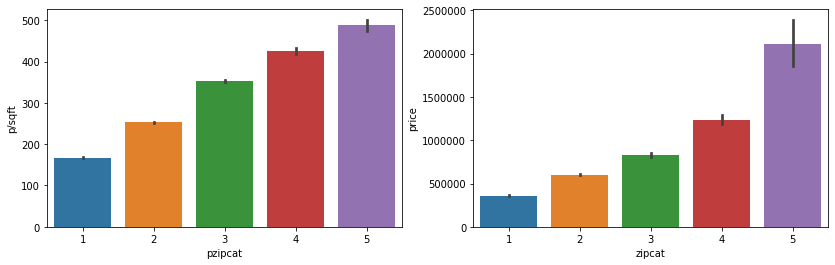

In [15]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.barplot(data=df,y='p/sqft',x='pzipcat')

plt.subplot(1,2,2)
sns.barplot(data=df, y='price',x='zipcat')
#zipcode is useful!

GRADE

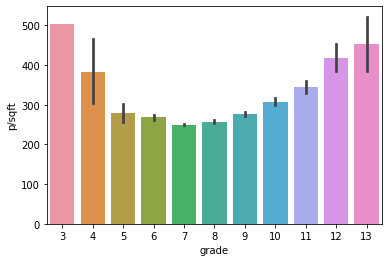

In [367]:
sns.barplot(data=df,x='grade',y='p/sqft')

In [16]:
#for refeaturing the categories of grades for better relations
def fgrade(x):
    if (x==7 or x==8):
        return 1
    elif(x in [5,6,9]):
        return 1
    elif(x==10):
        return 2
    elif(x==11):
        return 3
    elif(x==4):
        return 4
    elif(x==12):
        return 5
    else:
        return 6        

In [17]:
df['pgradecat']=df['grade'].apply(fgrade)

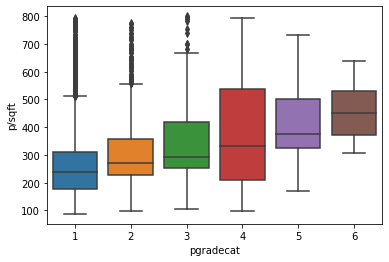

In [18]:
sns.boxplot(data=df,x='pgradecat',y='p/sqft')

AGE

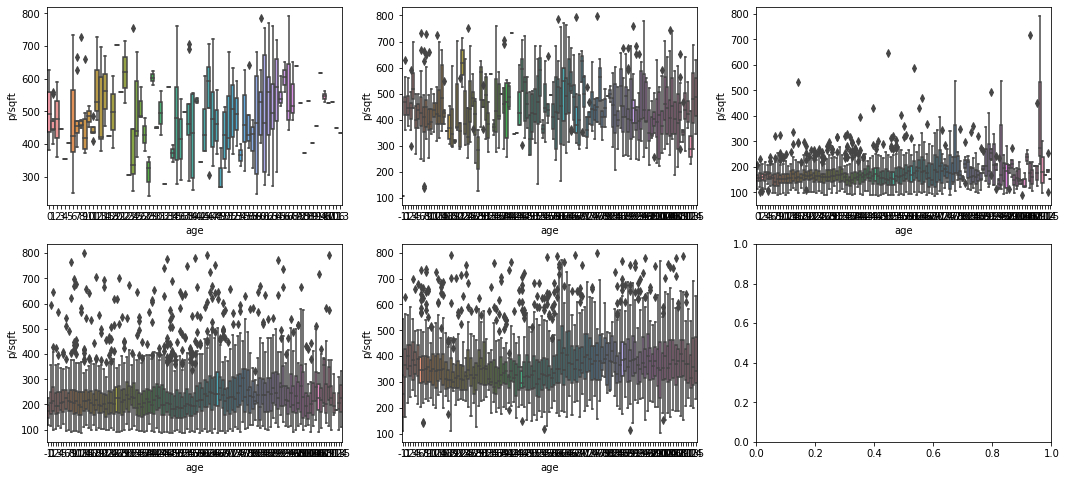

In [189]:
#I tried plotting p/sqft vs different age bands but did not find any relation
plt.figure(figsize=(18,8))

plt.subplot(2,3,1)
sns.boxplot(data=df[df['pzipcat']>4], y='p/sqft',x='age')

plt.subplot(2,3,2)
sns.boxplot(data=df[df['pzipcat']>3], y='p/sqft',x='age')

plt.subplot(2,3,3)
sns.boxplot(data=df[df['pzipcat']<2], y='p/sqft',x='age')

plt.subplot(2,3,4)
sns.boxplot(data=df[df['pzipcat']<3], y='p/sqft',x='age')

plt.subplot(2,3,5)
sns.boxplot(data=df[df['pzipcat']>2], y='p/sqft',x='age')

plt.subplot(2,3,6)




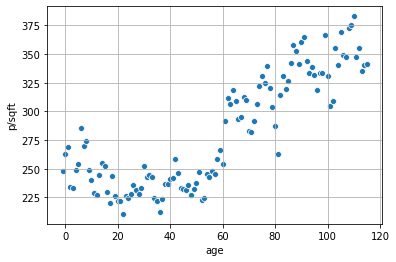

In [245]:
a=pd.DataFrame(df.groupby('age')['p/sqft'].mean())
a['age']=a.index
plt.grid(b=1)
sns.scatterplot(data=a,x='age',y='p/sqft')#average price for each age
#clearly the ages in between have lower prices

In [19]:
#as there is a very clear U shaped polynomial relation between price and the mean age, i am creating a new column which contains
#price for that respective age
def fage(x):
    return df.groupby('age')['p/sqft'].mean()[x]

In [20]:
df['page']=df['age'].apply(fage)
#'page' is not a categorical feature

BEDROOMS

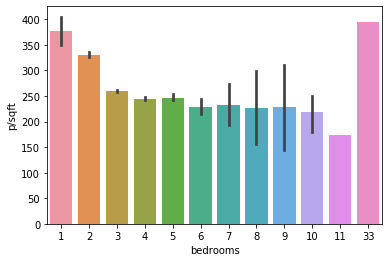

In [324]:
sns.barplot(data=df,x='bedrooms',y='p/sqft')
#1 and 2 bedrooms have higher price compared to others

In [21]:
def fbed(x):
    if (x==1):
        return 3
    elif(x==2):
        return 2
    else:
        return 1
df['pbed']=df['bedrooms'].apply(fbed)

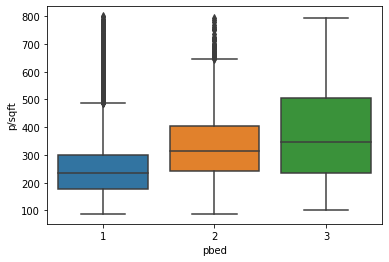

In [323]:
sns.boxplot(data=df,x='pbed',y='p/sqft')

SQFT BASEMENT

In [329]:
def base_lot(x):
    if x==0:
        return 0
    else:
        return 1

In [341]:
df['basement']=df['sqft_basement'].apply(base_lot)

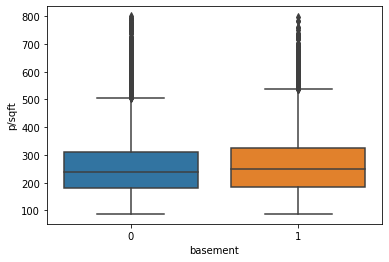

In [342]:
sns.boxplot(data=df,x='basement',y='p/sqft')#useless

In [344]:
df=df.drop('basement',axis=1)

MONTH

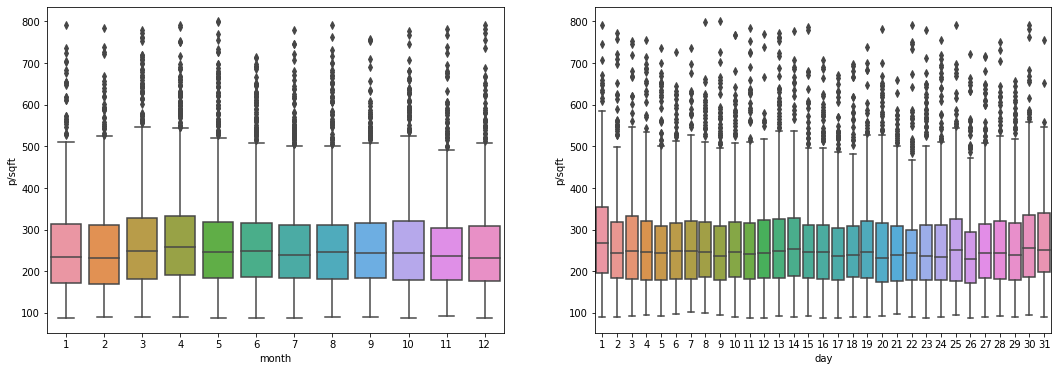

In [356]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='month',y='p/sqft')#average price for each month

plt.subplot(1,2,2)
sns.boxplot(data=df,x='day',y='p/sqft')#average price for each day
#pretty much the same for all so drop
df=df.drop

In [22]:
df=df.drop(['month','day'],axis=1)

RENOVATION

In [23]:
def fyr_ren(x):
    if x==0:
        return 0
    else:
        return 1

In [24]:
df['prenovated']=df['yr_renovated'].apply(fyr_ren)

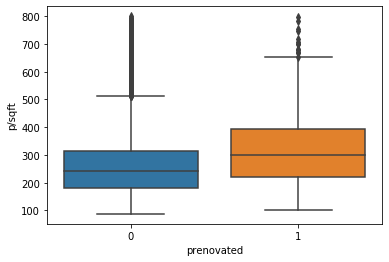

In [371]:
sns.boxplot(data=df,x='prenovated',y='p/sqft')

LATITUDE AND LONGITUDE

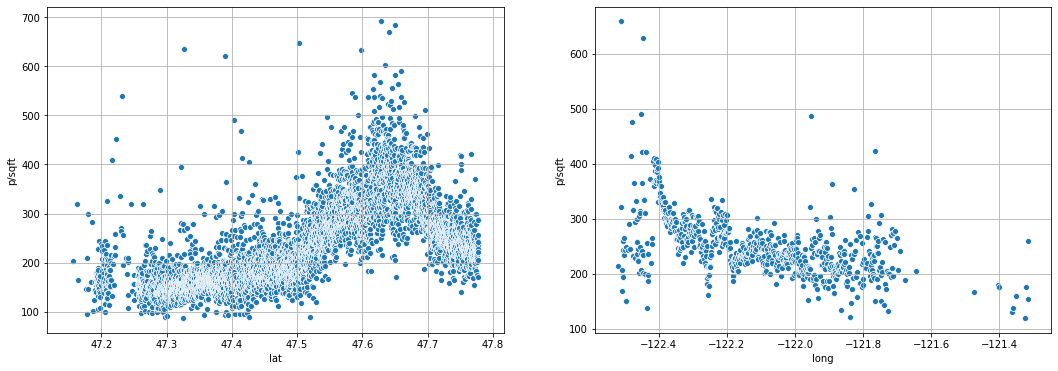

In [377]:
plt.figure(figsize=(18,6))
a=pd.DataFrame(df.groupby('lat')['p/sqft'].mean())
a['lat']=a.index
plt.subplot(1,2,1)
plt.grid(b=1)
sns.scatterplot(data=a,x='lat',y='p/sqft')
#there is a clear trend with a peak in between 

a=pd.DataFrame(df.groupby('long')['p/sqft'].mean())
a['long']=a.index
plt.subplot(1,2,2)
plt.grid(b=1)
sns.scatterplot(data=a,x='long',y='p/sqft')#average price/sqft for each longitude
#it seems to be decreasing  

In [25]:
#first mirroring the latitude after 47.65 to make it strictly increasing
def latcorrection(x):
    if (x>47.65):
        return 2*47.65-x
    else:
        return x

In [26]:
df['lat']=df['lat'].apply(latcorrection)

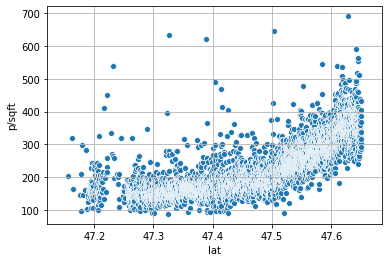

In [27]:
a=pd.DataFrame(df.groupby('lat')['p/sqft'].mean())
a['lat']=a.index
plt.grid(b=1)
sns.scatterplot(data=a,x='lat',y='p/sqft')
#this is good!

We will use these features as it is

SQFT ABOVE AND BELOW

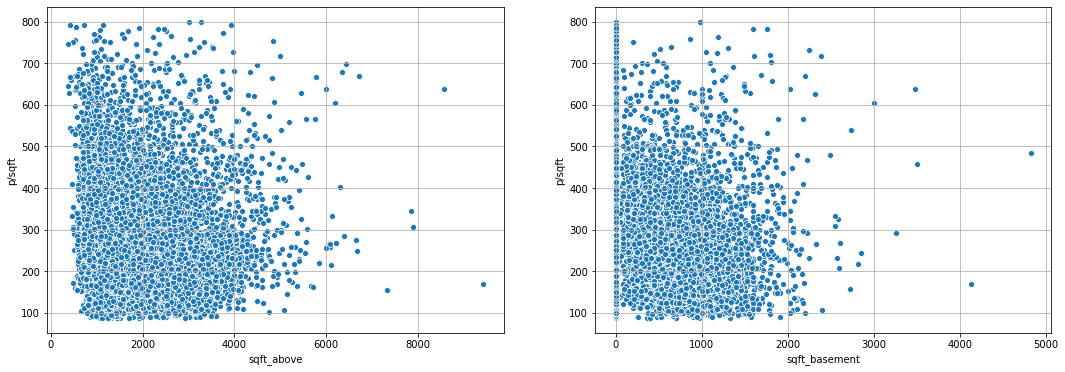

In [383]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.grid(b=1)
sns.scatterplot(data=df,x='sqft_above',y='p/sqft')

plt.subplot(1,2,2)
plt.grid(b=1)
sns.scatterplot(data=df,x='sqft_basement',y='p/sqft')
#doesn't seem to be of much use

In [384]:
df=df.drop(['sqft_above','sqft_basement'],axis=1)

FLOORS

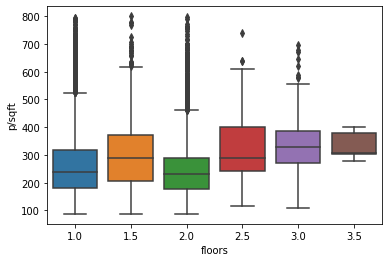

In [388]:
sns.boxplot(data=df,x='floors',y='p/sqft')

In [391]:
df.groupby('floors').mean()['p/sqft']

floors
1.0    262.602428
1.5    298.668171
2.0    249.124235
2.5    322.525248
3.0    332.054802
3.5    332.464070
Name: p/sqft, dtype: float64

In [28]:
def ffloor(x):
    if x >=2.5:
        return 3
    elif x==1.5:
        return 2
    else:
        return 1

In [29]:
df['pfloor']=df['floors'].apply(ffloor)

WATERFRONT

In [396]:
df['waterfront'].value_counts()

0    17071
1      139
Name: waterfront, dtype: int64

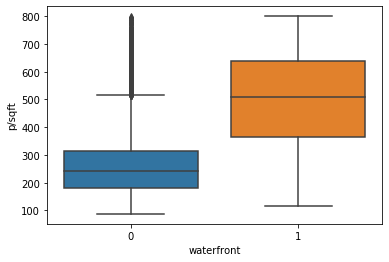

In [397]:
sns.boxplot(data=df,x='waterfront',y='p/sqft')
#this shows that houses with waterfront do have higher prices/sqft althouh they are rare to find

CONDITION

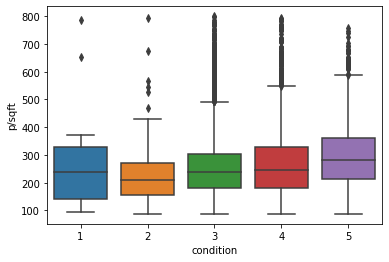

In [400]:
sns.boxplot(data=df,x='condition',y='p/sqft')

In [402]:
df.groupby('condition').mean()['p/sqft']
#the values are not very nearer and there is a gap of 70 b/w min and max hence we will use

condition
1    274.102485
2    231.145575
3    256.681368
4    269.806311
5    298.104544
Name: p/sqft, dtype: float64

In [30]:
def fcond(x):
    if x==5:
        return 3
    elif x==2:
        return 1
    else:
        return 2

In [31]:
df['pcond']=df['condition'].apply(fcond)

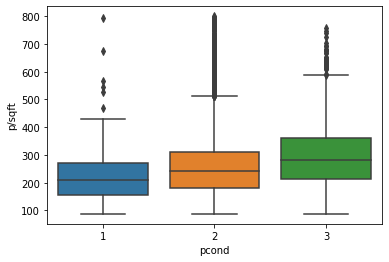

In [493]:
sns.boxplot(data=df,x='pcond',y='p/sqft')

MISCELLANEOUS

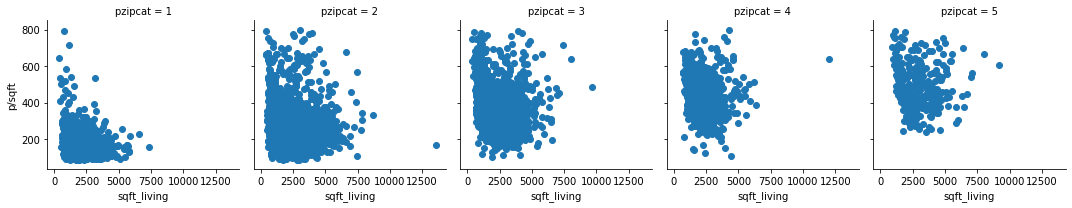

In [421]:
g=sns.FacetGrid(df, col='pzipcat')
g.map(plt.scatter,'sqft_living','p/sqft')
#useless

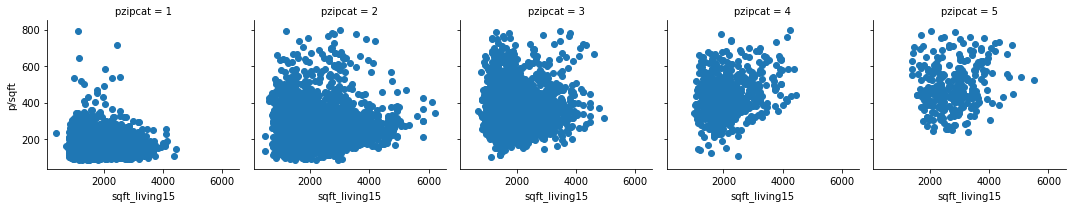

In [32]:
g=sns.FacetGrid(df, col='pzipcat')
g.map(plt.scatter,'sqft_living15','p/sqft')
#useless

In [5]:
def fzip_per(x):
    if x in a[a['p/sqft15']<200].index:
        return 1;
    elif x in a[a['p/sqft15']<300].index:
        return 2;
    elif x in a[a['p/sqft15']<400].index:
        return 3;
    elif x in a[a['p/sqft15']<490].index:
        return 4;    
    else:
        return 5;
a=pd.DataFrame(df.groupby('zipcode')['p/sqft15'].mean())
a['zipcode']=a.index
df['pzipcat']=df['zipcode'].apply(fzip_per)

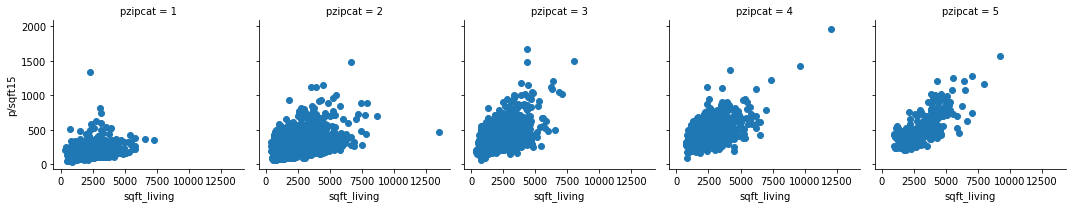

In [6]:
g=sns.FacetGrid(df, col='pzipcat')
g.map(plt.scatter,'sqft_living','p/sqft15')
#linear increase
#from this we might feel that p/sqft15 is better than p/sqft but the scores tell the other way

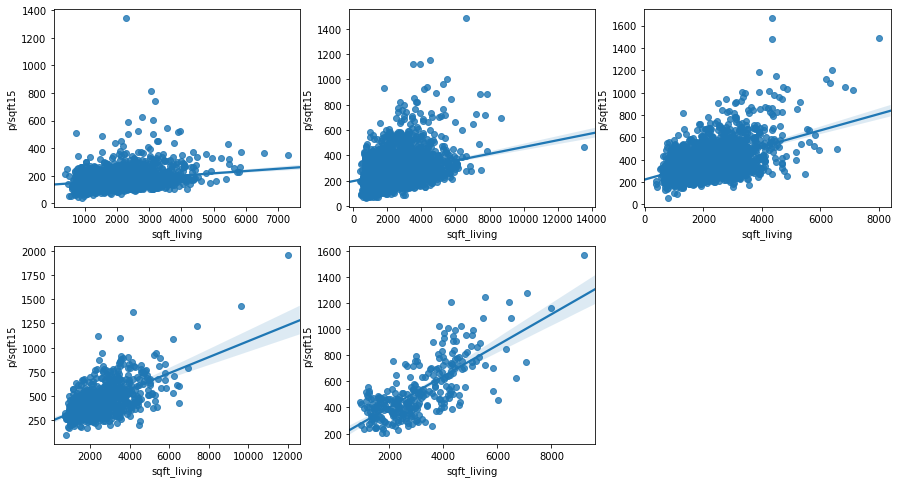

In [13]:
#For each pzipcat category i plotted a separate p/sqft vs sqft_living plot

plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
sns.regplot(data=df[df[1]==1],x='sqft_living',y='p/sqft15')
plt.subplot(2,3,2)
sns.regplot(data=df[df[2]==1],x='sqft_living',y='p/sqft15')
plt.subplot(2,3,3)
sns.regplot(data=df[df[3]==1],x='sqft_living',y='p/sqft15')
plt.subplot(2,3,4)
sns.regplot(data=df[df[4]==1],x='sqft_living',y='p/sqft15')
plt.subplot(2,3,5)
sns.regplot(data=df[df[5]==1],x='sqft_living',y='p/sqft15')
#There is a clear relation but i dont know how to use it properly in training

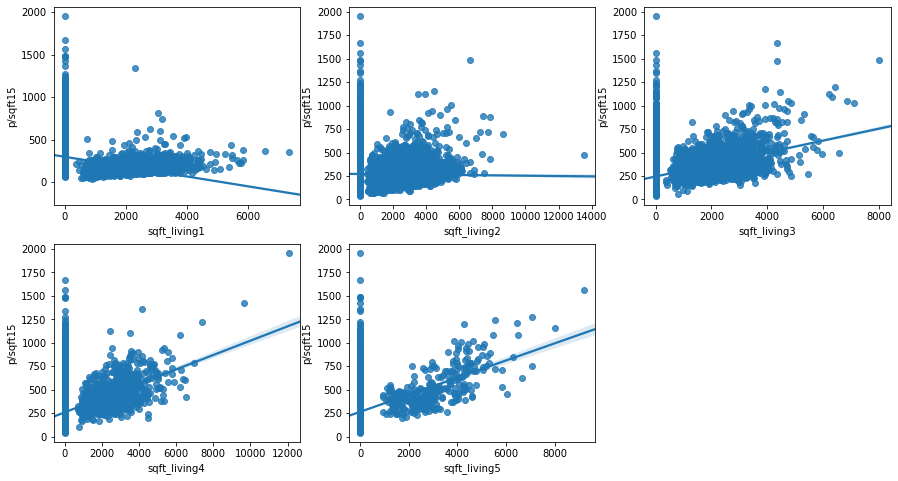

In [18]:
#For each pzipcat category i plotted a separate p/sqft vs sqft_living plot

csqft_change=pd.get_dummies(df['pzipcat'])
df=pd.concat([df,csqft_change],axis=1)

df['sqft_living1']=df['sqft_living']*df[1]
df['sqft_living2']=df['sqft_living']*df[2]
df['sqft_living3']=df['sqft_living']*df[3]
df['sqft_living4']=df['sqft_living']*df[4]
df['sqft_living5']=df['sqft_living']*df[5]

plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
sns.regplot(data=df,x='sqft_living1',y='p/sqft15')
plt.subplot(2,3,2)
sns.regplot(data=df,x='sqft_living2',y='p/sqft15')
plt.subplot(2,3,3)
sns.regplot(data=df,x='sqft_living3',y='p/sqft15')
plt.subplot(2,3,4)
sns.regplot(data=df,x='sqft_living4',y='p/sqft15')
plt.subplot(2,3,5)
sns.regplot(data=df,x='sqft_living5',y='p/sqft15')
#The 0 entries ruin the plot

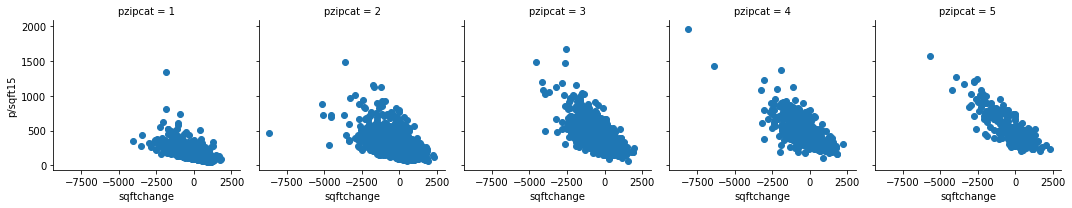

In [11]:
g=sns.FacetGrid(df, col='pzipcat')
g.map(plt.scatter,'sqftchange','p/sqft15')
#decrease but again dont know how to use independent relations

In [411]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'age',
       'zipcat', 'p/sqft', 'pzipcat', 'pgradecat', 'page', 'pbed', 'p/sqft15',
       'prenovated', 'pfloor', 'pcond'],
      dtype='object')

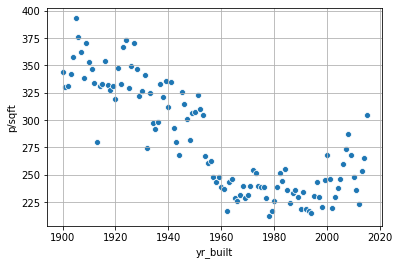

In [413]:
a=pd.DataFrame(df.groupby('yr_built')['p/sqft'].mean())
a['yr_built']=a.index
plt.grid(b=1)
sns.scatterplot(data=a,x='yr_built',y='p/sqft')
#has a U shape relation so might be useful

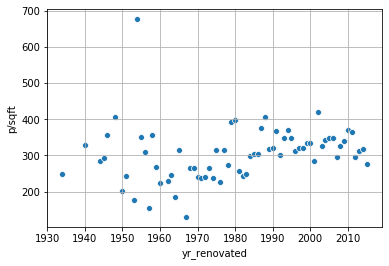

In [33]:
a=pd.DataFrame(df[df['prenovated']==1].groupby('yr_renovated')['p/sqft'].mean())
a['yr_renovated']=a.index
plt.grid(b=1)
sns.scatterplot(data=a,x='yr_renovated',y='p/sqft')
#there is a slight linear incresing trend

In [34]:
df['mix1']=df['pzipcat']*df['pgradecat']*df['pfloor']*df['page']

In [35]:
df['latmix']=df['lat']*df['pzipcat']*df['page']

In [36]:
df2=df[['sqft_living','sqft_living15','yr_built','age','pzipcat', 'pgradecat', 'page','waterfront', 'pbed','prenovated', 'pfloor','lat','long','mix1','latmix', 'pcond', 'p/sqft']]

In [37]:
df2.head()

,sqft_living,sqft_living15,yr_built,age,pzipcat,pgradecat,page,waterfront,pbed,prenovated,pfloor,lat,long,mix1,latmix,pcond,p/sqft
0,1180,1340,1955,59,1,1,266.444976,0,1,0,1,47.5112,-122.257,266.444976,12659.120535,2,188.050847
1,2570,1690,1951,63,2,1,306.413238,0,1,1,1,47.5790,-122.319,612.826477,29157.670946,2,209.338521
2,770,2720,1933,82,2,1,314.058625,0,2,0,1,47.5621,-122.233,628.117250,29874.575446,2,233.766234
3,1960,1360,1965,49,3,1,232.752665,0,1,0,1,47.5208,-122.393,698.257995,33181.778520,3,308.163265
4,1680,1800,1987,28,2,1,228.413843,0,1,0,1,47.6168,-122.045,456.827686,21752.672562,2,303.571429


In [38]:
df2.corr()['p/sqft']

sqft_living     -0.083229
sqft_living15    0.047735
yr_built        -0.280735
age              0.281372
pzipcat          0.713078
pgradecat        0.179982
page             0.382861
waterfront       0.198982
pbed             0.255519
prenovated       0.112152
pfloor           0.161973
lat              0.599672
long            -0.238064
mix1             0.498331
latmix           0.709432
pcond            0.095051
p/sqft           1.000000
Name: p/sqft, dtype: float64

# TESTING ON CV DATA

LINEAR REGRESSION WITH POLYNOMIAL FEATURES

In [39]:
X=df2.drop(['p/sqft'],axis=1)
y=df2['p/sqft']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3)
from sklearn.metrics import mean_squared_log_error

In [41]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
ln = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 

In [42]:
X_poly=poly.fit_transform(X_train)
X_poly_cv=poly.transform(X_cv)

In [43]:
ln.fit(X_poly,y_train)
pred_poly=ln.predict(X_poly_cv)

In [44]:
np.sqrt(mean_squared_log_error(y_cv, pred_poly))

0.20798701548895063

Random forest

In [491]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 150, random_state = 0) 

In [492]:
regressor.fit(X_poly,y_train)
pred_random_forest=regressor.predict(X_poly_cv)
np.sqrt(mean_squared_log_error(y_cv, pred_random_forest))

0.18493349451176075

# GRADIENT BOOSTING XGB

In [495]:
import xgboost as xgb
from sklearn.metrics import mean_squared_log_error

In [496]:
X=df2.drop(['p/sqft'],axis=1)
y=df2['p/sqft']
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)

In [599]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3)

In [600]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [705]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.8, learning_rate = 0.1,
                          min_child_weight=3,max_depth = 6, n_estimators = 200)

In [706]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [707]:
rmsle = np.sqrt(mean_squared_log_error(y_test, preds))
print("RMSE: %f" % (rmsle))

RMSE: 0.181277


the parameters have been manually tuned

USING THIS MODEL FOR TEST DATA

# TEST DATA PROCESSING

In [586]:
dft=pd.read_csv('test.csv')

In [587]:
dft['date']=pd.to_datetime(dft['date'])
dft['date1']=dft['date'].apply(lambda x : x.date())
dft['year']=dft['date1'].apply(lambda x:x.year)
dft.drop('date1',axis=1,inplace=True)

In [589]:
dft['age']=dft['year']-dft['yr_built']

In [591]:
a=pd.DataFrame(df.groupby('zipcode')['p/sqft'].mean())
a['zipcode']=a.index
dft['pzipcat']=dft['zipcode'].apply(fzip_per)

In [592]:
dft['page']=dft['age'].apply(fage)
dft['pgradecat']=dft['grade'].apply(fgrade)

In [593]:
dft['prenovated']=dft['yr_renovated'].apply(fyr_ren)
dft['pbed']=dft['bedrooms'].apply(fbed)

In [594]:
dft['pcond']=dft['condition'].apply(fcond)
dft['pfloor']=dft['floors'].apply(ffloor)
dft['lat']=dft['lat'].apply(latcorrection)

In [595]:
dft=dft[['sqft_living','sqft_living15','yr_built','age','pzipcat', 'pgradecat', 'page','waterfront', 'pbed','prenovated', 'pfloor','lat','long', 'pcond', 'id']]

# PREDICTIONS

In [710]:
X=df2.drop(['p/sqft'],axis=1)
y=df2['p/sqft']
X_test=dft.drop('id',axis=1)

In [711]:
X_poly=poly.fit_transform(X)
X_poly_test=poly.transform(X_test)

In [712]:
dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(X_test)

In [713]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.8, learning_rate = 0.1,
                          min_child_weight=3,max_depth = 6, n_estimators = 200)

In [714]:
xg_reg.fit(X_poly,y)
pred_xgb = xg_reg.predict(X_poly_test)

In [719]:
pred_xgb=pd.DataFrame(pred_xgb)
pred_xgb.columns=['price']
submission_df=pd.concat([dft['id'],pred_xgb],axis=1)

In [724]:
submission_df['price']=submission_df['price'] * dft['sqft_living']

In [725]:
submission_df.to_csv('5_poly_xgb_fe.csv',index=False)